# Trying to model ignition delay from LLNL for Iso-octane


In [1]:
import cantera as ct
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from cantera import ck2cti
ck2cti.main([
    '--input=/Users/ebubeajulu/Code/GTL/ic8/ic8_ver3_mech.txt',
    '--thermo=/Users/ebubeajulu/Code/GTL/ic8/prf_icv3_therm_dat.txt',
    '--output=/Users/ebubeajulu/Code/GTL/ic8/ic8_ver3_mech.cti',
    '--permissive'
        ])

INFO:root:Skipping unexpected species "HOCO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3CHO2H" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NC5H12" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O2H-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O2H-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O2H-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H11O2-1" while reading the

INFO:root:Skipping unexpected species "C6H12OOH2-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH2-4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH2-5" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH2-6" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH3-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH3-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH3-4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH3-5" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH3-6" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH1-2O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H12OOH1-3O2" while reading thermodynamics entry.
INFO:root:Skipping unexpecte

INFO:root:Skipping unexpected species "C7H14OOH3-6" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH3-7" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH4-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH4-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH4-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH1-2O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH1-3O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH1-4O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH1-5O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH2-1O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H14OOH2-3O2" while reading thermodynamics entry.
INFO:root:Skipping u

INFO:root:Skipping unexpected species "C6H102-4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ETES1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "MVOX" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "VTHF" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "EDHF" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ETC6" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "KES1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H111O2H-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H111O2H-4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H111O2H-5" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H111O2H-6" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H112O2H-4" while reading thermodyna

INFO:root:Skipping unexpected species "C7H162-4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2COOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "OLC8OOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NE" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C4H8OH-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C4H8OH-1" while reading thermodynamics entry.


INFO:root:Skipping unexpected species "C4H2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NC4H3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "IC4H3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C4H4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NC4H5" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NC4H10" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C7H6" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H5CH3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H5CH2J" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H5CH2OOJ" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H5CH2OOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H5CH2OJ" while reading thermodynamics entry.

INFO:root:Skipping unexpected species "CYC4H5O21" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "O*CC*CCJC*O" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C*OC*CCJ" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H5O1_1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C14H14" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C14H13" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "STYLBEN" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "XYLENE" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "IND" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NAPH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CR1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CR2" while reading thermodynamics entry.
IN

Wrote CTI mechanism file to '/Users/ebubeajulu/Code/GTL/ic8/ic8_ver3_mech.cti'.
Mechanism contains 874 species and 7522 reactions.
Validating mechanism...

**** WARNING ****
For species EC6H13O2, discontinuity in s/R detected at Tmid = 1388
	Value computed using low-temperature polynomial:  107.806
	Value computed using high-temperature polynomial: 107.116
PASSED.


In [4]:
gas = ct.Solution('/Users/ebubeajulu/Code/GTL/ic8/ic8_ver3_mech.cti')



**** WARNING ****
For species EC6H13O2, discontinuity in s/R detected at Tmid = 1388
	Value computed using low-temperature polynomial:  107.806
	Value computed using high-temperature polynomial: 107.116


In [5]:
sorted(gas.species_names)

['A-AC5H10O',
 'A-AC6H12O',
 'A-BC5H10O',
 'A-BC6H12O',
 'A-CC5H10O',
 'A-CC6H12O',
 'A-DC5H10O',
 'A-DC6H12O',
 'A-EC6H12O',
 'AC3H4CH2CHO',
 'AC3H4CH2COCH3',
 'AC3H4COC2H5',
 'AC3H4COCH3',
 'AC3H5CHCHO',
 'AC3H5CHCOCH3',
 'AC3H5CHO',
 'AC3H5CO',
 'AC3H5OOH',
 'AC5H10',
 'AC5H10CHO',
 'AC5H10OH',
 'AC5H10OOH-A',
 'AC5H10OOH-AO2',
 'AC5H10OOH-B',
 'AC5H10OOH-BO2',
 'AC5H10OOH-C',
 'AC5H10OOH-CO2',
 'AC5H10OOH-D',
 'AC5H10OOH-DO2',
 'AC5H11',
 'AC5H11O',
 'AC5H11O2',
 'AC5H11O2H',
 'AC5H9-A1',
 'AC5H9-A2',
 'AC5H9-C',
 'AC5H9-D',
 'AC5H9O-A2',
 'AC5H9O-C',
 'AC6H11-A2',
 'AC6H11-C',
 'AC6H11-D',
 'AC6H11-E',
 'AC6H11O-C',
 'AC6H12',
 'AC6H12CHO-B',
 'AC6H12CHO-D',
 'AC6H12OH',
 'AC6H12OOH-A',
 'AC6H12OOH-AO2',
 'AC6H12OOH-B',
 'AC6H12OOH-BO2',
 'AC6H12OOH-C',
 'AC6H12OOH-CO2',
 'AC6H12OOH-D',
 'AC6H12OOH-DO2',
 'AC6H12OOH-E',
 'AC6H12OOH-EO2',
 'AC6H13',
 'AC6H13O',
 'AC6H13O2',
 'AC6H13O2H',
 'AC8H16OOH-A',
 'AC8H16OOH-AO2',
 'AC8H16OOH-B',
 'AC8H16OOH-BO2',
 'AC8H16OOH-C',
 'AC8H16OOH

In [6]:
gas.TP = 900, 10e6
gas.set_equivalence_ratio(phi=1.0, fuel='IC8H18', oxidizer='O2:0.2, N2:0.8' )
gas()



  gas:

       temperature             900  K
          pressure           1e+07  Pa
           density         40.2989  kg/m^3
  mean mol. weight         30.1557  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8605e+05        1.767e+07     J
   internal energy       3.379e+05        1.019e+07     J
           entropy            6719        2.026e+05     J/K
    Gibbs function      -5.461e+06       -1.647e+08     J
 heat capacity c_p          1282.7        3.868e+04     J/K
 heat capacity c_v            1007        3.037e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2        0.19685         0.208881         -23.3084
                N2       0.787402         0.731465         -20.2331
            IC8H18       0.015748         0.059654         -94.4585
     [ +871 minor]          

In [7]:
def set_gas_concentrations(gas, phi):
    """
    Set the concentrations in the gas according to the description
    in the paper by 
    """
    # Set it to desired stoichiometry with synthetic air (20% O2 : 80% N2)
    gas.set_equivalence_ratio(phi=1.0, fuel='IC8H18', oxidizer='O2:0.2, N2:0.8' )
    # Then dilute the whole thing 1:2 with extra N2
    gas.X = gas.X / 3.0 
    gas.X[gas.species_index('N2')] += 2./3.

set_gas_concentrations(gas, 1.0)
gas()


  gas:

       temperature             900  K
          pressure           1e+07  Pa
           density         40.2989  kg/m^3
  mean mol. weight         30.1557  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8605e+05        1.767e+07     J
   internal energy       3.379e+05        1.019e+07     J
           entropy            6719        2.026e+05     J/K
    Gibbs function      -5.461e+06       -1.647e+08     J
 heat capacity c_p          1282.7        3.868e+04     J/K
 heat capacity c_v            1007        3.037e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2        0.19685         0.208881         -23.3084
                N2       0.787402         0.731465         -20.2331
            IC8H18       0.015748         0.059654         -94.4585
     [ +871 minor]          

In [8]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 10e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []
    
    print_data = True
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
    
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index('C2H')   
    i_o = gas.species_index('O')
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
        return ignition_time_ms
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        return np.infty

In [9]:
def get_ignition_delay_air(temperature, pressure_bar=10, phi=1.0, plot=False):
    """
    For figure 14
    
    temperature in K
    pressure in bar
    phi is equivalence ratio
    """
    set_gas_concentrations(gas, phi)
    mole_fractions = gas.X

    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)
    return time

Reached end time 10.27 ms in 4080 steps


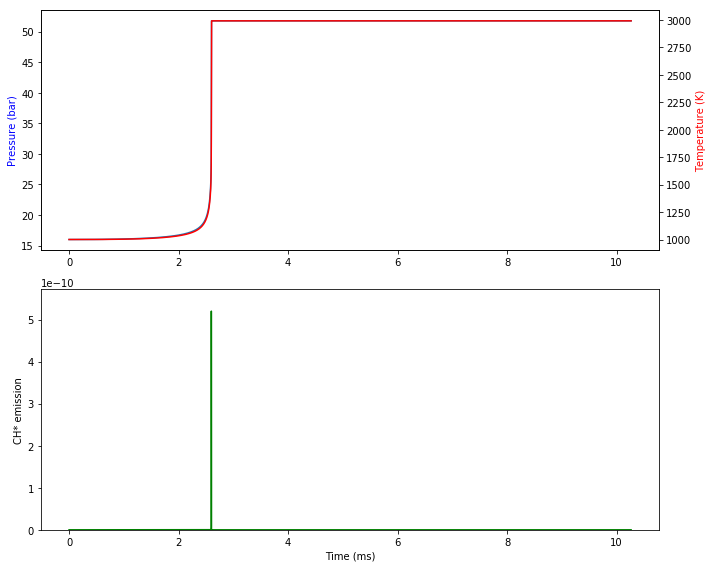

At 1000 K 16 bar, ignition delay time is 2.59873954944 ms


In [15]:
get_ignition_delay_air(1000, 16, 1, plot=True)
plt.rcParams['figure.figsize'] = [10, 8]


# Figure 14 ignition delay times from LLNL for iso-octane in N2 as bath gas comparing to the Dagaut et al 2014 

In [21]:
LLNL_temperatures = 1000/np.linspace(0.70,1.55,25)
pressures_bar = 16
phi = 1

LLNL_results = dict()
times = []
for T in LLNL_temperatures:
    t = get_ignition_delay_air(T,pressures_bar, phi, plot=False)
    times.append(t)
    LLNL_results[pressures_bar]=times

Reached end time 10.35 ms in 3550 steps
At 1428.57142857 K 16 bar, ignition delay time is 0.0440795863859 ms
Reached end time 10.90 ms in 3408 steps
At 1359.7733711 K 16 bar, ignition delay time is 0.070679172335 ms
Reached end time 11.06 ms in 3644 steps
At 1297.2972973 K 16 bar, ignition delay time is 0.108836511956 ms
Reached end time 10.37 ms in 3475 steps
At 1240.31007752 K 16 bar, ignition delay time is 0.170104697636 ms
Reached end time 11.60 ms in 3577 steps
At 1188.11881188 K 16 bar, ignition delay time is 0.277714677668 ms
Reached end time 10.35 ms in 3718 steps
At 1140.14251781 K 16 bar, ignition delay time is 0.470958521293 ms
Reached end time 10.05 ms in 3751 steps
At 1095.89041096 K 16 bar, ignition delay time is 0.801433369943 ms
Reached end time 10.21 ms in 3929 steps
At 1054.94505495 K 16 bar, ignition delay time is 1.31355381303 ms
Reached end time 12.60 ms in 4058 steps
At 1016.94915254 K 16 bar, ignition delay time is 2.08427681729 ms
Reached end time 10.15 ms in 41

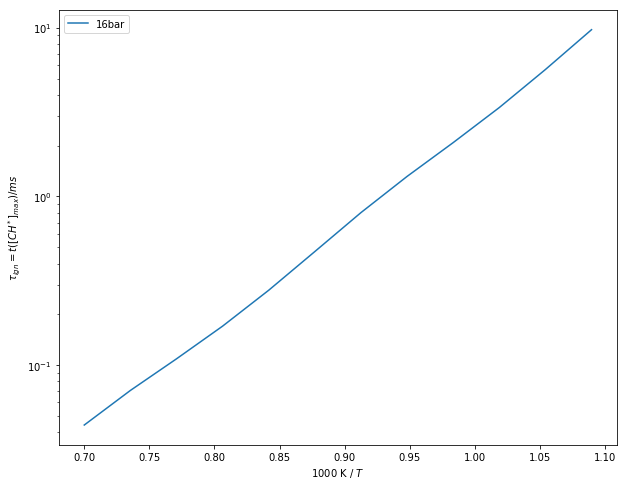

In [22]:
plt.semilogy(1000/LLNL_temperatures,times,label='{}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]


In [23]:
import pickle
with open('ic8-LLNL.pkl','w') as fp:
    pickle.dump((LLNL_temperatures, LLNL_results), fp)

In [17]:
yvalues = [
0.0438935,
0.0508193,
0.0605986,
0.0712038,
0.0824521,
0.0997690,
0.117224,
0.141850,
0.169140,
0.193028,
0.233559,
0.274467,
0.332111,
0.384622,
0.445364,
0.546873,
0.615061,
0.712339,
0.849383,
0.983721,
1.13926,
1.31950,
1.52800,
1.76967,
2.04964,
2.33921,
2.59264,
3.09168,
3.52918,
3.96890,
4.52889,
5.24581,
6.07524,
6.73451,
7.91373,
8.90155,
9.86753,
11.4268,
12.8521,
14.6714,
16.9904,
18.5574,
21.1825,
23.4784,
27.5917,
30.1389,
35.4191,
39.8386,
46.1394,
51.8925,
61.8858,
68.5850,
80.6040,
94.7255
]


xvalues = [
0.657614,
0.660053,
0.668666,
0.674810,
0.682193,
0.690803,
0.695710,
0.705556,
0.712933,
0.722793,
0.730166,
0.740019,
0.748628,
0.759721,
0.765868,
0.775710,
0.786810,
0.799138,
0.806515,
0.818843,
0.829936,
0.843501,
0.852120,
0.864449,
0.878014,
0.889110,
0.900212,
0.910061,
0.927338,
0.935965,
0.942116,
0.958153,
0.969245,
0.985293,
0.993909,
1.00872, 
1.02476, 
1.03338, 
1.04572, 
1.06423, 
1.07409, 
1.08520, 
1.10124, 
1.11357, 
1.12466, 
1.13824, 
1.14933, 
1.16290, 
1.17523, 
1.18633, 
1.19865, 
1.20728, 
1.21961, 
1.23070
]



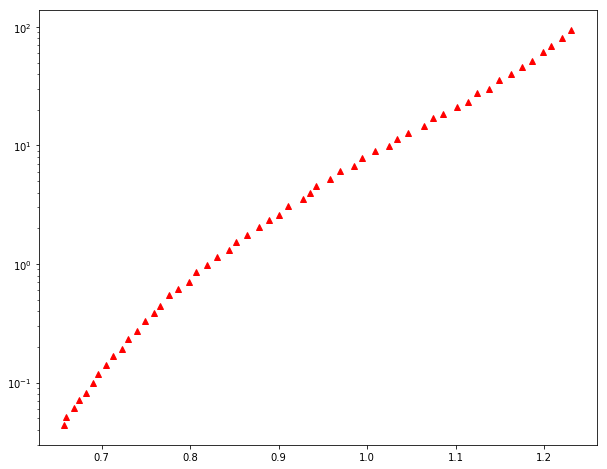

In [18]:
plt.semilogy(xvalues, yvalues, 'r^',label='Pressure profile')

<function matplotlib.pyplot.show>

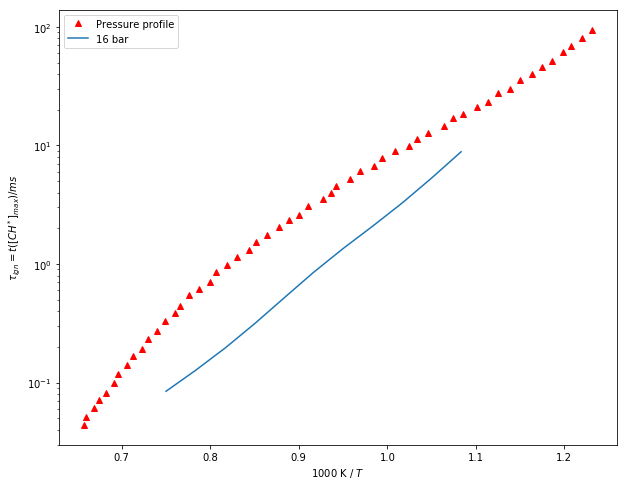

In [20]:


plt.semilogy(xvalues, yvalues, 'r^',label='Pressure profile')


    
plt.semilogy(1000/LLNL_temperatures, times, label='{} bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.show